### 內建函式 ( eval 和 exec )

In [1]:
a=eval('x+y',{'x':2, 'y':3})
print(a)

5


exec() 可以包住一個多行的程式敘述(多行字串'''...'''), 並執行!

In [2]:
exec('''
for i in range(5):
    print(i)
''')

0
1
2
3
4


### 標準函式庫


### random

In [23]:

import random
import time
random.seed(time.time()*random.random())
print(random.random())

0.9116984663310886


In [26]:
a=['a','b','c','d','e']
print(a)
random.shuffle(a)
print(a)

['a', 'b', 'c', 'd', 'e']
['e', 'b', 'a', 'd', 'c']


In [32]:
def reorder(s:str):
    # import random
    # import time
    random.seed(time.time()*random.random())
    tmp:list=[e for e in s]
    ## 隨機打亂串列順序
    random.shuffle(tmp)
    ## 回傳打亂
    return "".join(tmp)


In [56]:
print(reorder("hello world"))

llreowd ohl


### math

In [60]:
import math
a=math.sin(math.pi/3)
print(a)

0.8660254037844386


### statistics

In [67]:
import statistics as st
a=[5,5,5,2,2,3,3,3,3,4,9,0,1,7,8]
print(sorted(a))
print(st.mean(a))
print(st.median(a))
print(st.mode(a))

# 若串列元素是字串:
b=[str(e) for e in a]
print(st.mode(b),'<== type=',type(st.mode(b)))

[0, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 7, 8, 9]
4
3
3
3 <== type= <class 'str'>


### datetime

In [68]:
import datetime
from datetime import date

In [92]:
d=datetime.date(2025,2,10)
print(d,'← 型別=',type(d))

d2=date(2025,2,11)
print(d2,'← 型別=',type(d2))

today=datetime.date.today()
print(today)

## 這邊用到 isoformat yyyy-mm-ddThh:MM:ss.msecond
timenow=datetime.datetime.now()
print(datetime.datetime.isoformat(timenow)) 

2025-02-10 ← 型別= <class 'datetime.date'>
2025-02-11 ← 型別= <class 'datetime.date'>
2025-02-10
2025-02-10T10:47:02.389955


### time

In [93]:
import time
print(time.time()) ## 回傳 從 1970/01/01至當下的 timestamp秒數

1739155870.6794417


In [141]:
print("小睡 1秒")
time.sleep(1)
print("醒來說 hello!")

## 小試一下不用 time.sleep的方式的話: 
t1=time.time()
print(t1)
i=0
while(time.time()-t1<3.0):
    i+=1
print(i)
print("hello  world")

小睡 1秒
醒來說 hello!
1739157182.1828449
27480238
hello  world


### re 正規表示式

In [142]:
import re

In [163]:
rule=re.compile(r'\d\d\d') ## 連續有3個數字, pattern字串是 r-string r'*****'

result=rule.search('a1b2c4defg')
print(result) ## 沒有連續當然篩不出來

result=rule.search('ab257c4defg')
print(result.group())

results=rule.findall('ab251c497defg') ## 搜索所有符合規則的結果.
print(results if len(results)!=0 else 'found nothing!')

None
257
['251', '497']


In [167]:
rule2=re.compile(r'hello', flags=re.I) ## 忽略掉大小寫視為一樣,
contents='498750hello,487akjdHello'

result=rule2.search(contents)
print(result.group())

results=rule2.findall(contents)
print(results)

hello
['hello', 'Hello']


In [190]:
contents="""Python is 
easy to learn
"""
print(contents.replace('\n',''))
# contents=contents.replace('\n','')
rule3=re.compile(r'^python', flags=re.M|re.I ) ## 搜字串開頭是 python的
result=rule3.search(contents)
print(result)

Python is easy to learn
<re.Match object; span=(0, 6), match='Python'>


In [193]:
contents4="hello aajkdjal;dj wrold ajkdj world"
rule4=re.compile(r'(hello)(world)')

result=rule4.search(contents4)
print(result)

None


### os


In [211]:
import os
import sys
app_curdir="c:\\justin\\python\\python_class" 
os.chdir(app_curdir)
print(os.getcwd()) ## 取當前程式執行的路徑

os.chdir("testdir") ## 切到資料夾

## 上面已經切到 testdir/下了, 直接 open當下的 testfile.txt就好, 可以用相對路徑:
print(os.getcwd())
with open("testfile.txt","r") as f: 
    buf=f.read()
    print(buf)

os.chdir(app_curdir)

c:\justin\python\python_class
c:\justin\python\python_class\testdir
hello world!


In [213]:
print(os.listdir())

['advanced.ipynb', 'advanced_2.ipynb', 'mod1.py', 'testdir', '__pycache__']


In [221]:
thefile_ctime=os.stat("testdir\\testfile.txt").st_ctime
thefile_mtime=os.stat("testdir\\testfile.txt").st_mtime
thefile_atime=os.stat("testdir\\testfile.txt").st_atime
print(os.stat("testdir\\testfile.txt").st_ctime)
print("創建時間: ctime=",time.ctime(thefile_ctime))
print("修改時間: ctime=",time.ctime(thefile_mtime))
print("存取時間: ctime=",time.ctime(thefile_atime))
#os.stat_result(st_mode=33206, 
# st_ino=6473924464534434, 
# st_dev=579078238, 
# st_nlink=1, 
# st_uid=0, 
# st_gid=0, 
# st_size=12, 
# st_atime=1739166708, 
# st_mtime=1739166119, 
# st_ctime=1739166112)


1739166112.6454773
創建時間: ctime= Mon Feb 10 13:41:52 2025
修改時間: ctime= Mon Feb 10 13:41:59 2025
存取時間: ctime= Mon Feb 10 14:00:59 2025


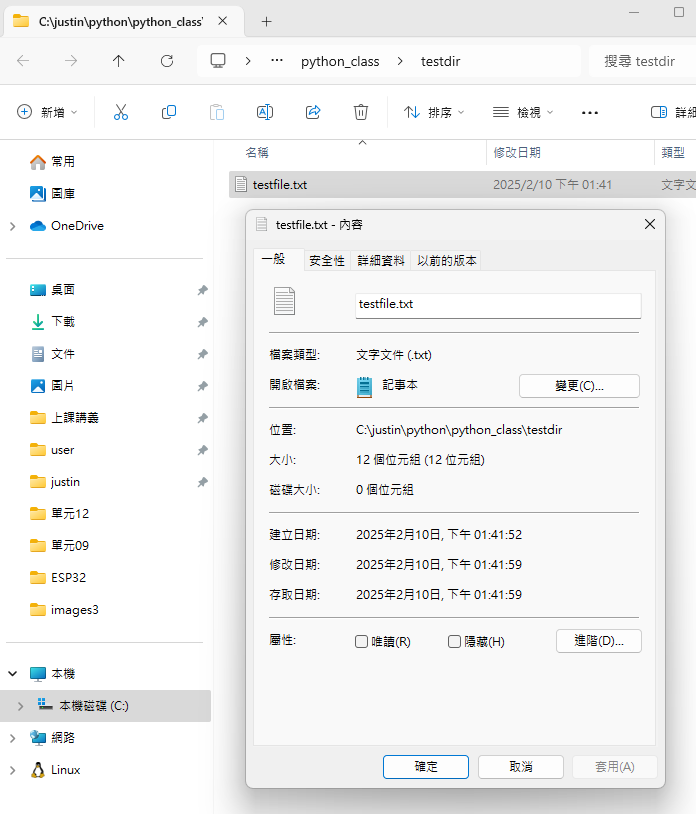

In [230]:
file_name='testfile.txt'
os.chdir(app_curdir)
print(os.path.abspath(file_name))

c:\justin\python\python_class\testfile.txt


In [234]:
os.system("dir")

0

### shutil

In [235]:
import shutil

In [236]:
shutil.copy("testdir\\testfile.txt","testdir\\testfile2.txt")

'testdir\\testfile2.txt'

In [247]:
file1="testfile.txt"
file2="testfile3.txt"
path=os.getcwd()

f1=open(path+"\\testdir\\"+file1,'r')
f2=open(path+"\\testdir\\"+file2,'a')

shutil.copyfileobj(f1,f2)
f1.close()
f2.close()


### 高效迭代器 itertools

In [248]:
import itertools


In [250]:
a=itertools.count(1)
b=itertools.count(5,2)

for i in a:
    print(i, end=' ')
    if i>6:break
print()
for i in b:
    print(i, end=' ')
    if i>20:break

1 2 3 4 5 6 7 
5 7 9 11 13 15 17 19 21 

In [252]:
print(next(a))

9


### 容器資料型態 collections

In [253]:
# Counter
# Counter 可以創建一個 dict 計數器物件，用來計算可迭代物件中每個物件的數量，Counter 有下列幾種方法:
# 方法	   參數	   說明｜
# elements()	  獨立每個元素成為可迭代物件。
# new_child	n	  取出數量前 n 多的項目。
# update		      將原本的數量加上新的數量。
# subtract		  將原本的數量減去新的數量。
# total		      計算全部數量的總和 ( 3.10 才支援 )。

from collections import Counter

t1="hello world"
a=Counter(t1)
print(a)

Counter({'l': 3, 'o': 2, 'h': 1, 'e': 1, ' ': 1, 'w': 1, 'r': 1, 'd': 1})


In [255]:
c=a.most_common(3)
print(c)

[('l', 3), ('o', 2), ('h', 1)]


In [256]:
## deque 
# 若是要改進 list在數據量多時執行效率可能要改以 deque容器

from collections import deque

a = deque(['a','b','c','d','e'])   # 建立 deque 物件

a.append('x')
a.append('y')        # 在最右邊加入元素
print(a)             # deque(['a', 'b', 'c', 'd', 'e', 'x', 'y'])

a.appendleft('x')
a.appendleft('y')    # 在最左邊加入元素
print(a)             # deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y'])

b = a.copy()         # 淺拷貝
print(b)             # deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y'])

print(a.count('x'))  # 2，計算 x 出現的次數

a.extend(['m','n'])  # 在最右邊加入 ['m','n']
print(a)             # deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])

a.extendleft(['m','n'])  # 在最左邊加入 ['m','n']
print(a)                 # deque(['n', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])

print(a[5])      # b，取出第六個元素 ( 第一個為 0 )

a.insert(1,'k')  # 在第二個位置插入 k
print(a)         # deque(['n', 'k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])

a.pop()          # 移除最右邊的元素
print(a)         # deque(['n', 'k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])

a.popleft()      # 移除最左邊的元素
print(a)         # deque(['k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])

a.remove('x')    # 移除第一個 x
print(a)         # deque(['k', 'm', 'y', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])

a.reverse()      # 反轉
print(a)         # deque(['m', 'y', 'x', 'e', 'd', 'c', 'b', 'a', 'y', 'm', 'k'])

a.rotate(5)      # 往右邊移動五格
print(a)         # deque(['b', 'a', 'y', 'm', 'k', 'm', 'y', 'x', 'e', 'd', 'c'])

a.clear()        # 清空項目
print(a)         # deque([])

deque(['a', 'b', 'c', 'd', 'e', 'x', 'y'])
deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y'])
deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y'])
2
deque(['y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])
deque(['n', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])
b
deque(['n', 'k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm', 'n'])
deque(['n', 'k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])
deque(['k', 'm', 'y', 'x', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])
deque(['k', 'm', 'y', 'a', 'b', 'c', 'd', 'e', 'x', 'y', 'm'])
deque(['m', 'y', 'x', 'e', 'd', 'c', 'b', 'a', 'y', 'm', 'k'])
deque(['b', 'a', 'y', 'm', 'k', 'm', 'y', 'x', 'e', 'd', 'c'])
deque([])


In [264]:
# OrderedDict
from collections import OrderedDict
a=OrderedDict()
a['x']=2 ## order1
a['a']=3 ## order2
a['z']=1 ## order3
print(a)

OrderedDict([('x', 2), ('a', 3), ('z', 1)])


### CSV 檔案操作


In [265]:
import csv
from csv import reader


In [268]:
buf=reader(open("testdir\\csvtest.csv","r"))

In [271]:
print(list(buf))

[['name', 'id', 'color', 'price'], ['apple', '1', 'red', '100'], ['orange', '2', 'orange', '50'], ['grap', '3', 'purple', '80'], ['watermelon', '4', 'green', '60']]


### json檔案操作

In [272]:
import json

In [275]:
jsonFile=open("testdir\\"+"jsontest.json",'r')
a=json.load(jsonFile)
print(a,type(a))
jsonFile.close()





{'hello': ['111', '222', '333'], 'world': {'object': 0, 'str': 1, 'int': 2, 'float': 3, 'double': 4}} <class 'dict'>


In [277]:
jsonFile=open("testdir\\"+"jsontest2.json",'w')
data={}
data['name']=['justin','liu']
data['age']=[55,66]
json.dump(data,jsonFile)
jsonFile.close()